# Performance Estimates for Leveraged Options Portfolio

## Overview:

This script measures the performance of a buy and hold strategy on the SPY ETF versus a portflio that replicates the exposure to the SPY through LEAPS and invests the remaining cash in short term government bonds.

*  System 1:  

A 3x leveraged portfolio is tested using synthetic long positions in the ETF.  The synthetic long position is created using a short put and a long call.  The position is sized so that the option delta is equal to 3X the delta implied by a 100% allocation to the SPY.  Delta is adjusted a maximum of once per day if the position moves more than 100 delta from its targeted level.

*  System 2:

A 1x portfolio is tested using synthetic long positions in the ETF.  The synthetic long position is created using a short put and a long call.  The position is sized so that the option delta is equal to 1X the delta implied by a 100% allocation to the SPY.  Delta is adjusted a maximum of once per day if the position moves more than 100 delta from its targeted level.

*  System 3:

A 1x portfolio is tested using long call positions in the ETF.  The position is sized so that the option delta is equal to 1X the delta implied by a 100% allocation to the SPY.  Delta is adjusted a maximum of once per day if the position moves more than 100 delta from its targeted level.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyfolio as pf
%matplotlib inline  

import warnings; warnings.simplefilter('ignore')

pd.options.display.latex.repr = True


## Helper method for getting system stats and benchmarks.

In [2]:


def get_system_stats(df):
    df['pret']=np.log(df['portfolio']/df['portfolio'].shift(1))
    df=df.dropna()
    #pf.create_returns_tear_sheet(df[['Date','pret']])

    system_ret=df[['Date', 'pret']]
    benchmark_ret=df[['Date', 'return']]

    system_ret['Date'] = pd.to_datetime(system_ret['Date'])
    system_ret.set_index('Date', inplace=True)
    
    benchmark_ret['Date'] = pd.to_datetime(benchmark_ret['Date'])
    benchmark_ret.set_index('Date', inplace=True)

    series1=system_ret.iloc[:,0]
    benchmark=benchmark_ret.iloc[:,0]
    x=pf.create_returns_tear_sheet(series1, benchmark_rets=benchmark, bootstrap=None)
    return x
    

## System 1

Start date,2007-05-22
End date,2016-10-06
Total months,112
,Backtest
Annual return,-9.7%
Cumulative returns,-61.5%
Annual volatility,53.7%
Sharpe ratio,0.08
Calmar ratio,-0.10
Stability,0.00
Max drawdown,-94.7%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,94.67,2007-06-01,2009-03-09,NaT,NaN
1,2.79,2007-05-23,2007-05-24,2007-05-30,6
2,0.34,2007-05-30,2007-05-31,2007-06-01,3
3,0.00,2007-05-22,2007-05-22,2007-05-22,1
4,0.00,2007-05-22,2007-05-22,2007-05-22,1


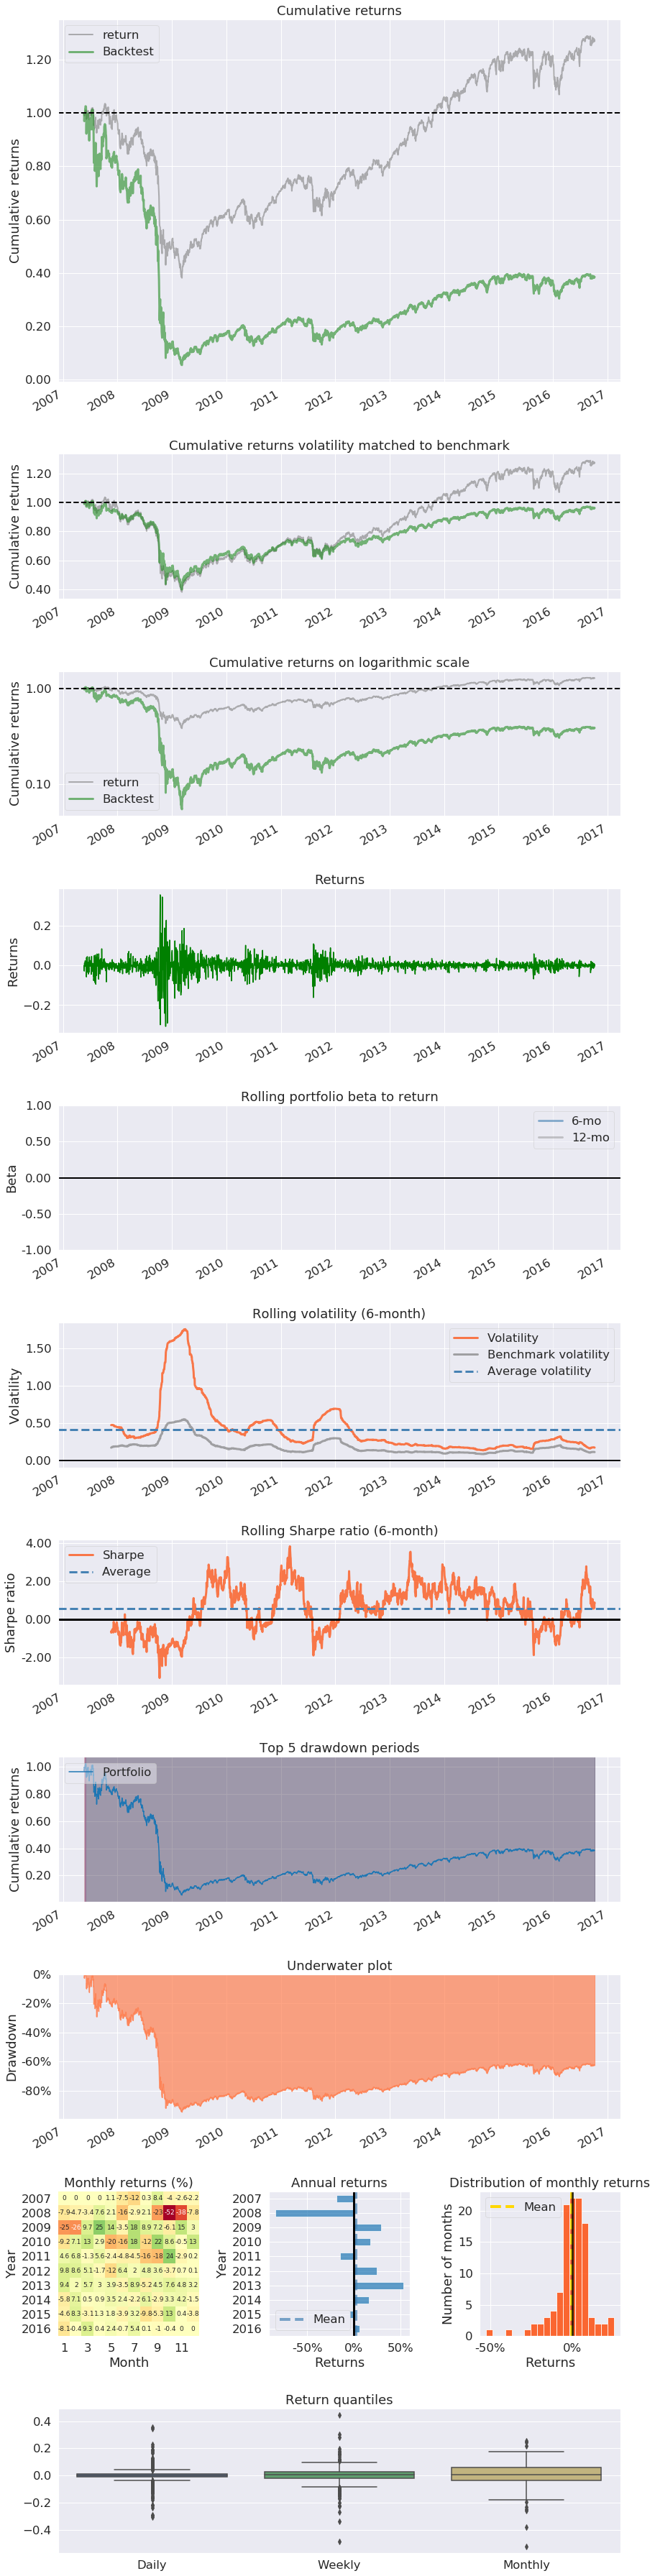

In [3]:
import warnings; warnings.simplefilter('ignore')
df=pd.read_csv('backtest/synthlev.csv')
tear1=get_system_stats(df)

## System 2

Start date,2007-05-22
End date,2016-10-06
Total months,112
,Backtest
Annual return,-1.1%
Cumulative returns,-9.5%
Annual volatility,21.5%
Sharpe ratio,0.06
Calmar ratio,-0.02
Stability,0.15
Max drawdown,-51.7%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,51.70,2007-10-09,2008-11-20,NaT,NaN
1,10.07,2007-07-19,2007-08-15,2007-10-09,59
2,4.24,2007-06-01,2007-06-26,2007-07-13,31
3,0.97,2007-05-23,2007-05-24,2007-05-30,6
4,0.30,2007-07-13,2007-07-18,2007-07-19,5


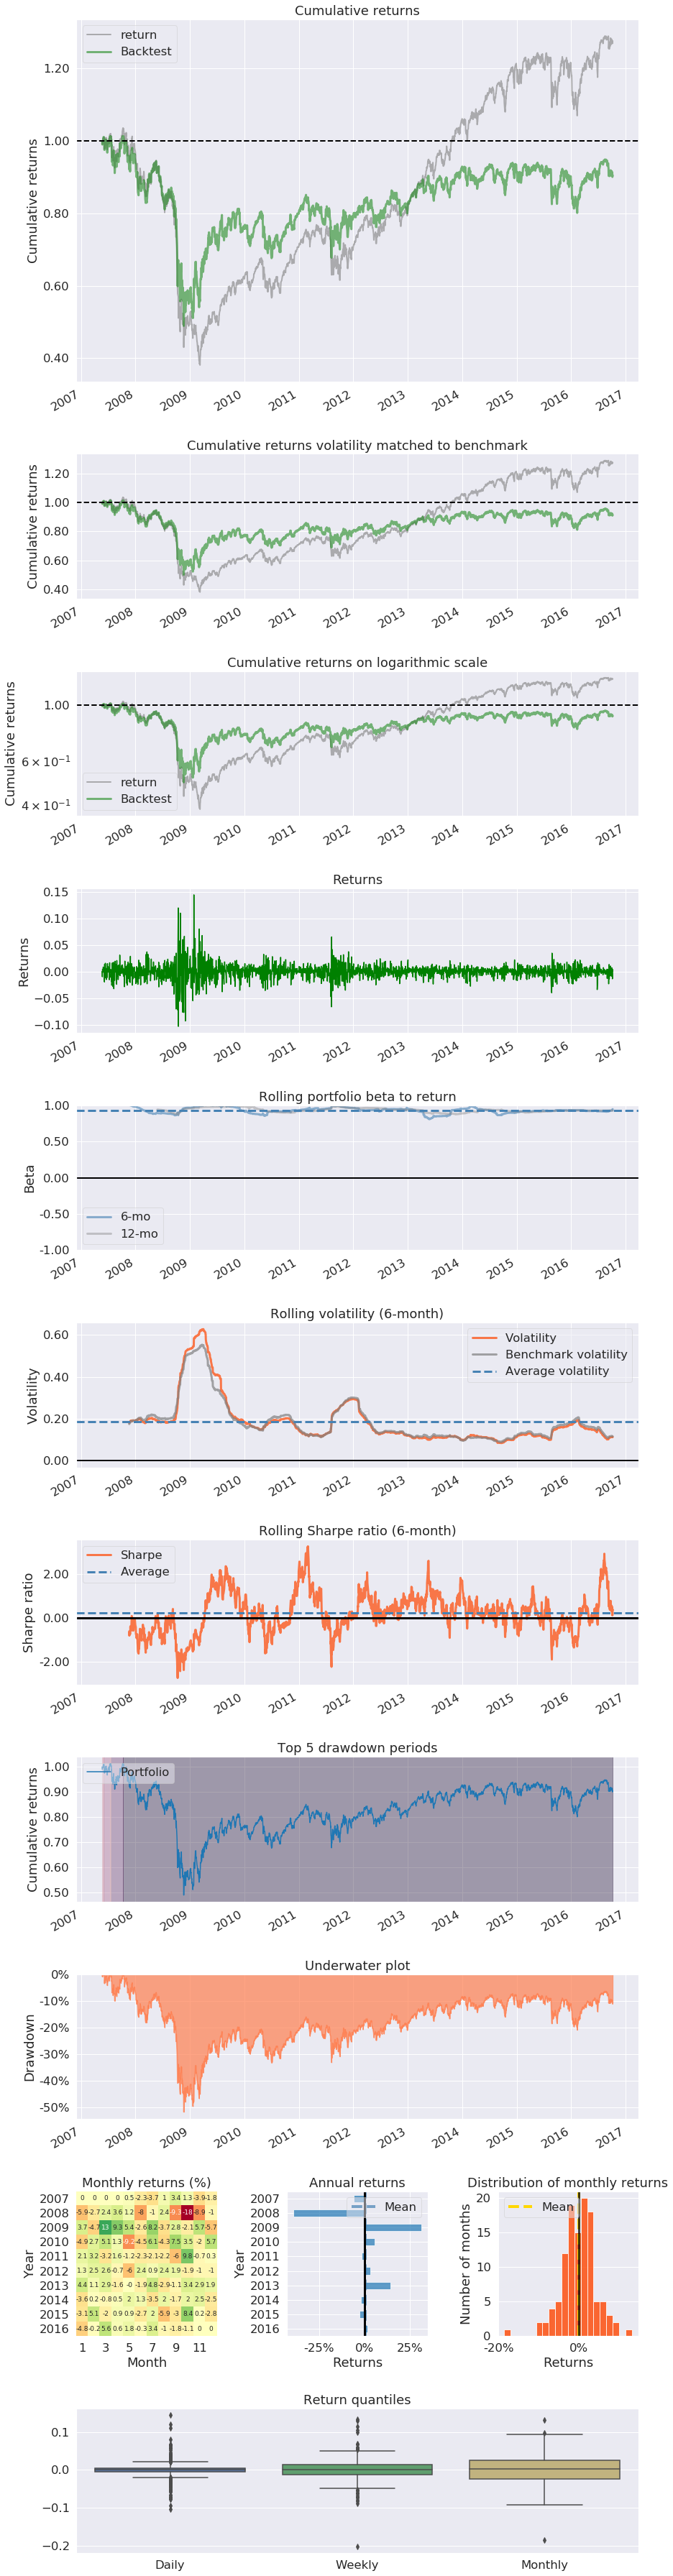

In [4]:
import warnings; warnings.simplefilter('ignore')
df=pd.read_csv('backtest/synth.csv')
tear1=get_system_stats(df)

## System 3

Start date,2007-05-22
End date,2016-10-06
Total months,112
,Backtest
Annual return,-3.0%
Cumulative returns,-24.7%
Annual volatility,10.2%
Sharpe ratio,-0.25
Calmar ratio,-0.08
Stability,0.01
Max drawdown,-37.9%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,37.85,2007-07-19,2009-03-09,NaT,NaN
1,3.62,2007-06-01,2007-06-26,2007-07-13,31
2,0.99,2007-05-22,2007-05-24,2007-05-30,7
3,0.17,2007-05-30,2007-05-31,2007-06-01,3
4,0.09,2007-07-13,2007-07-18,2007-07-19,5


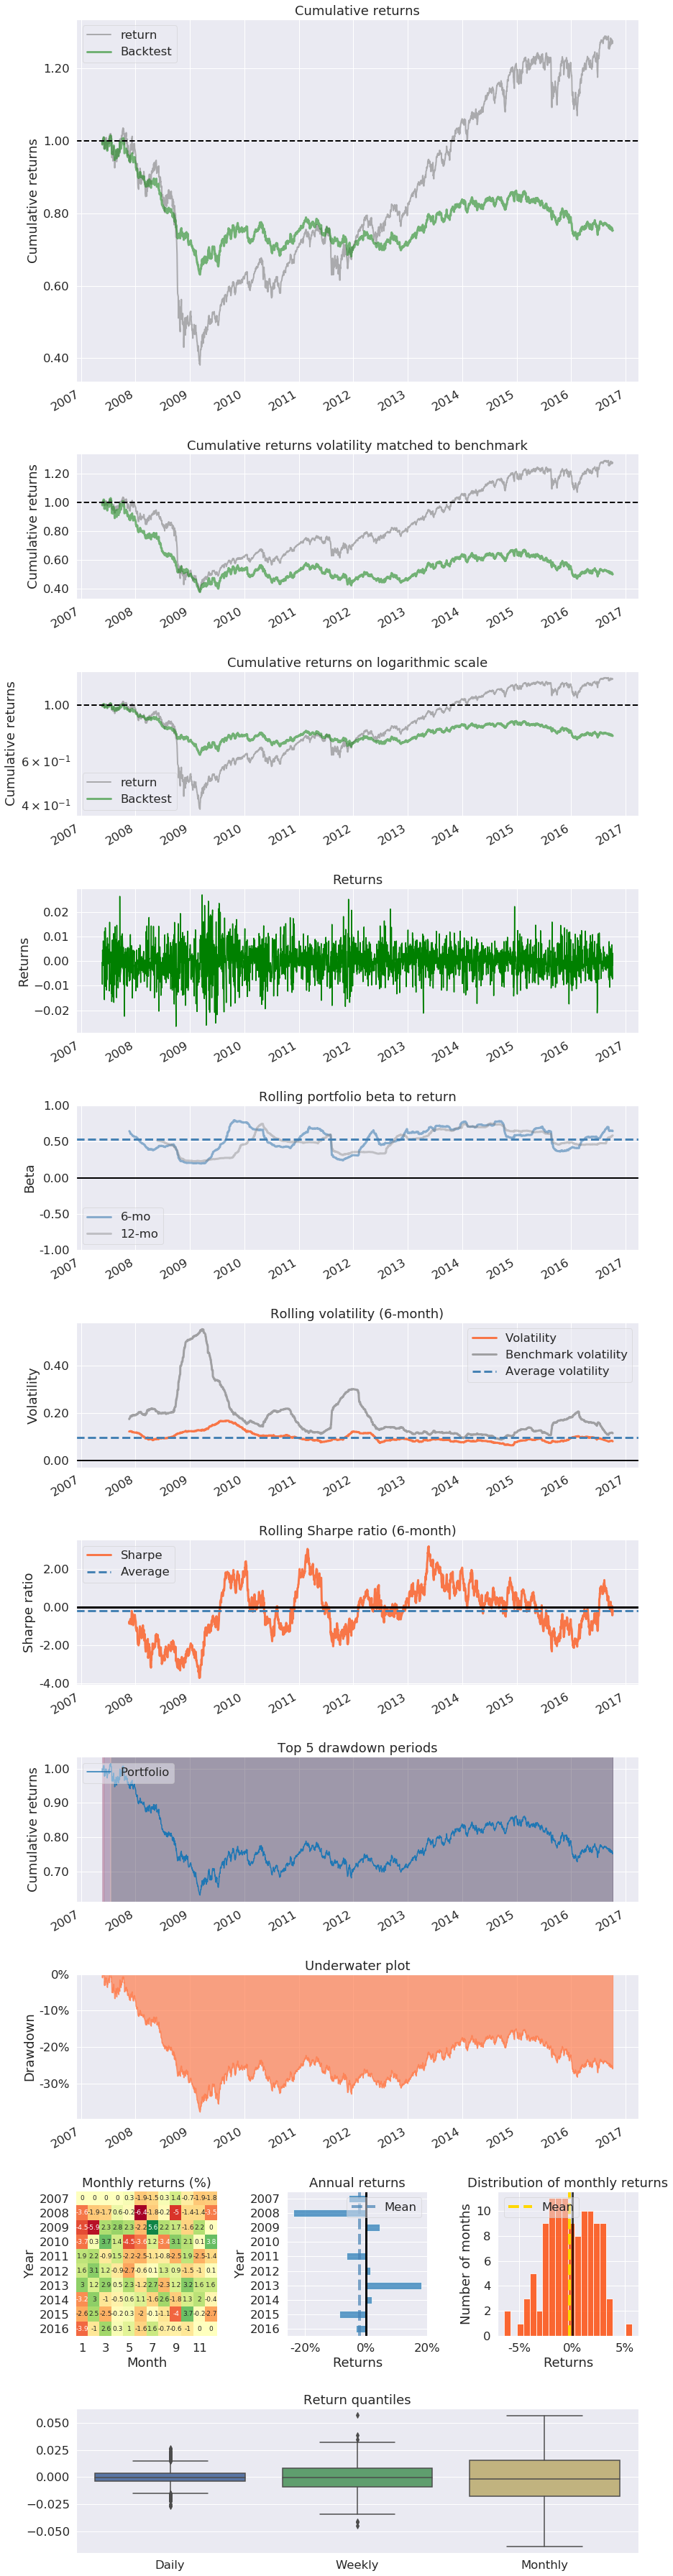

In [5]:
import warnings; warnings.simplefilter('ignore')
df=pd.read_csv('backtest/call.csv')
tear1=get_system_stats(df)